# **Ejemplo de Telecomunicaciones**

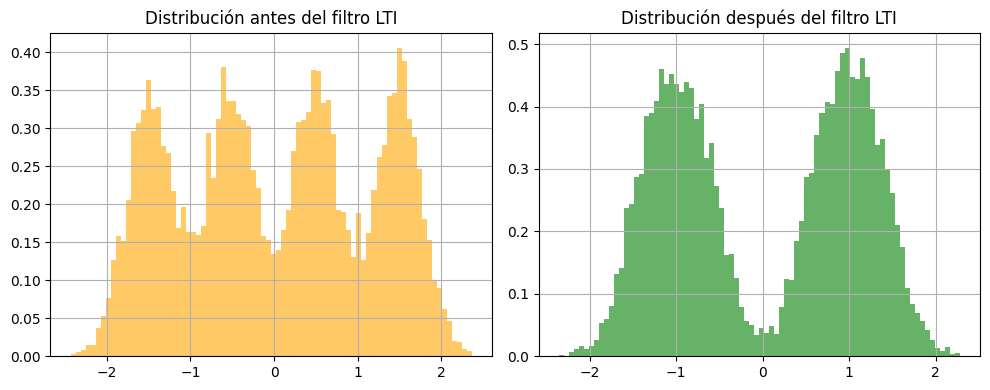

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy.stats import norm

# Generar señal BPSK
N = 10000
bits = np.random.randint(0, 2, N)
bpsk = 2*bits - 1

# Canal con distorsión (filtro del canal)
h_channel = [1, 0.5]
x_distorted = lfilter(h_channel, 1.0, bpsk)

# Ruido
snr_db = 8
snr = 10**(snr_db/10)
noise_std = np.sqrt(1/(2*snr))
noise = noise_std * np.random.randn(N)
received = x_distorted + noise

# Filtro LTI (igualador)
h_eq = [1, -0.5]
equalized = lfilter(h_eq, 1.0, received)

# Grafica de la distribución antes y después del filtrado
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.hist(received, bins=80, density=True, color='orange', alpha=0.6, label="Canal distorsionado")
plt.title("Distribución antes del filtro LTI")
plt.grid()

plt.subplot(1,2,2)
plt.hist(equalized, bins=80, density=True, color='green', alpha=0.6, label="Señal igualada")
plt.title("Distribución después del filtro LTI")
plt.grid()

plt.tight_layout()
plt.show()

# **Ejemplo de Imagen y Visión**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar imagen en escala de grises con ruido simulado
img = cv2.imread(cv2.samples.findFile("naturaleza bosque y lago.jpg"), cv2.IMREAD_GRAYSCALE)
noisy_img = img + np.random.normal(0, 25, img.shape).astype(np.uint8)

# Filtro LTI: Suavizado con Gaussiano
smoothed_img = cv2.GaussianBlur(noisy_img, (5,5), 1.5)

# Visualizar histogramas antes y después
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(noisy_img.ravel(), bins=256, color='gray', alpha=0.7)
plt.title("Histograma antes del filtro")

plt.subplot(1,2,2)
plt.hist(smoothed_img.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Histograma después del filtro Gaussiano")

plt.tight_layout()
plt.show()

# **Ejemplo de Señales Biomédicas**

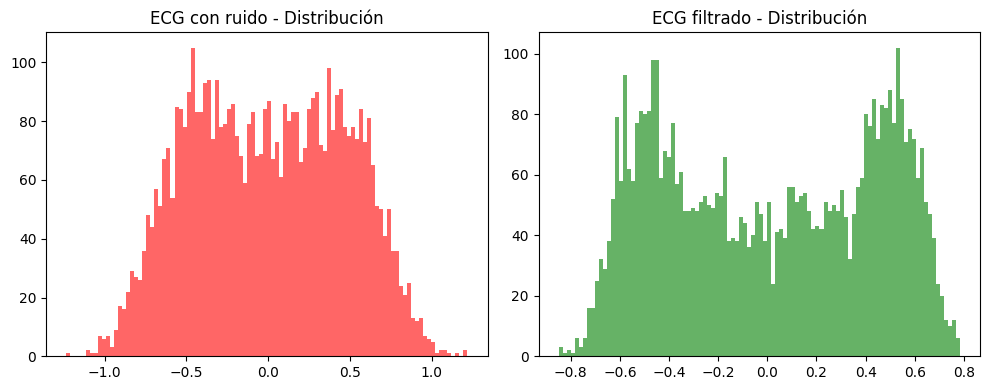

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Simular ECG + ruido
fs = 500  # Frecuencia de muestreo
t = np.linspace(0, 10, fs*10)
ecg_clean = 0.6*np.sin(2*np.pi*1.5*t)  # Pulso simulado
noise = 0.2 * np.random.randn(len(t))
ecg_noisy = ecg_clean + noise

# Filtro pasa banda para limpiar ECG (LTI)
def bandpass_filter(signal, low, high, fs, order=2):
    from scipy.signal import butter, filtfilt
    nyq = fs / 2
    b, a = butter(order, [low/nyq, high/nyq], btype='band')
    return filtfilt(b, a, signal)

ecg_filtered = bandpass_filter(ecg_noisy, 0.5, 40, fs)

# Histograma antes y después del filtrado
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(ecg_noisy, bins=100, color='red', alpha=0.6)
plt.title("ECG con ruido - Distribución")

plt.subplot(1,2,2)
plt.hist(ecg_filtered, bins=100, color='green', alpha=0.6)
plt.title("ECG filtrado - Distribución")

plt.tight_layout()
plt.show()